# (1) Numerically solve the following system of equations

$x_{1} - 2x_{2} + 9x_{3} + 13x_{4} = 1\\
-5x_{1} + x_{2} +6x_{3} - 7x_{4} = -3\\
4x_{1} + 8x_{2} - 4x_{3} - 2x_{4} = -2\\
8x_{1} + 5x_{2} - 7x_{3} + x_{4} = 5$

In [12]:
import numpy as np
import scipy.linalg

A = np.array([[1, -2, 9, 13], [-5, 1, 6, -7], [4, 8, -4, -2], [8, 5, -7, 1]])
b = np.array([1, -3, -2, 5])

solv1 = scipy.linalg.solve(A, b)
print(solv1)

#-------------------

invA = scipy.linalg.inv(A)
solv2 = np.dot(invA, b)
print(solv2)



[ 1.76839237 -1.02724796  0.49318801 -0.55858311]
[ 1.76839237 -1.02724796  0.49318801 -0.55858311]


# (2) Numerically integrate the following integrals and compare the results to the exact value of each one.

$\int_{-1}^{1}\frac{dx}{1 + x^2}= \frac{\pi}{2}\\
\int_{-\infty}^{\infty}\frac{dx}{(e^{x} + x + 1)^2 + \pi^2} = \frac{2}{3}$

In [8]:
import numpy as np
from scipy.integrate import quad


#First integral
f = lambda x: 1./(1 + x**2)

i = quad(f, -1., 1.0)
print(i)


#Second integral

g = lambda x: 1./((np.exp(x) + x + 1)**2 + (np.pi)**2)

l = quad(g, -np.inf, np.inf)
print(l)

(1.5707963267948968, 1.7439342485646153e-14)
(0.6666666666666667, 6.918648089738248e-12)


/Users/sebastianquinteroarias/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/Users/sebastianquinteroarias/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


# (3) Use $scipy.integrate.odeint$ to solve the following set of nonlinear ODEs.


$\frac{dx}{dt} = a(y - x)\\
\frac{dy}{dt} = (c - a)x - xz + cy\\
\frac{dz}{dt} = xy - bz$

# For the initial conditions, use $x_{0} = −10$, $y_{0} = 0$, $z_{0} = 35$. Setting the initial parameters to $a = 40$, $b = 5$, $c = 35$ gives chaotic solutions like those shown below. Setting $b = 10$ while keeping $a = 40$ and $c = 35$ yields periodic solutions. Take care to choose a small enough time step 

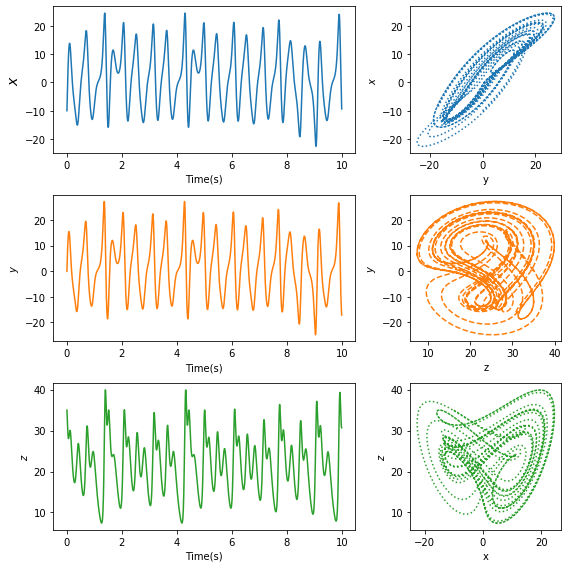

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


#Definition of the function
def f(X, t, params):
    x, y, z = X
    a, b, c = params
    derivs = [a*(y - x), (c - a)*x - x*z + c*y, x*y - b*z ]
    return derivs


#Initial conditions
x0 = -10.0
y0 = 0.0
z0 = 35.0

#Parameters
a0 = 40.0
b0 = 5.0
c0 = 30.0

#Arrays
params = [a0, b0, c0]
X0 = [x0, y0, z0]

#Time interval
tStop = 10.
tInc = 0.005
t = np.arange(0., tStop, tInc)

#Solution of the function
sol = odeint(f, X0, t, args=(params,))
x = sol[:, 0]
y = sol[:, 1]
z = sol[:, 2]

#Plot the solutions
fig, ax = plt.subplots(3, 2, figsize=(8, 8),
                       gridspec_kw={'width_ratios': [2, 1]})


ax[0,0].plot(t, x, color='C0')
ax[0,0].set_xlabel('Time(s)')
ax[0,0].set_ylabel(r'$x$', fontsize=14)


ax[1,0].plot(t, y, color='C1')
ax[1,0].set_xlabel('Time(s)')
ax[1,0].set_ylabel(r'$y$')

ax[2,0].plot(t, z, color='C2')
ax[2,0].set_xlabel('Time(s)')
ax[2,0].set_ylabel(r'$z$')


ax[0,1].plot(y, x, linestyle=':', color='C0')
ax[0,1].set_xlabel('y')
ax[0,1].set_ylabel(r'$x$')

ax[1,1].plot(z, y, linestyle='--', color='C1')
ax[1,1].set_xlabel('z')
ax[1,1].set_ylabel(r'$y$')

ax[2,1].plot(x, z, linestyle=':',color='C2')
ax[2,1].set_xlabel('x')
ax[2,1].set_ylabel(r'$z$')


plt.tight_layout()
